In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "heart-disease-cleveland-uci"

# Heart Disease UCI
**About the dataset**

There are 14 attributes:

1. **age**: age (in years)

2. **sex**: gender (1 = male; 0 = female)

3. **cp**: chest pain type

There are three criteria for classifying different types of angina (chest pain) under three categories (according to this NCBI paper: https://pubmed.ncbi.nlm.nih.gov/20494662/):

◼ Location: Chest pain occurs around the substernal portion of the body

◼ Cause: Pain is experienced after induction of emotional/physical stress

◼ Relief: The pain goes away after taking nitroglycerine and/or a rest

-- i : typical angina (all criteria present)

-- ii : atypical angina (two of three criteria satisfied)

-- iii : non-anginal pain (less than one criteria satisfied)

-- iv : asymptomatic (none of the criteria are satisfied)

4.  **trestbps**: resting blood pressure (in mmHg, upon admission to the hospital)

5.  **chol**: serum cholesterol in mg/dL

6.  **fbs**: fasting blood sugar > 120 mg/dL (likely to be diabetic) 1 = true; 0 = false

7.  **restecg**: resting electrocardiogram results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8.  **thalach**: maximum heart rate achieved

9.  **exang**: exercise induced angina (1 = yes; 0 = no)

10.  **oldpeak**: ST depression induced by exercise relative to rest (in mm, achieved by subtracting the lowest ST segment points during exercise and rest)

11.  **slope**: the slope of the peak exercise ST segment, ST-T abnormalities are considered to be a crucial indicator for identifying presence of ischaemia (according to this research paper on NCBI: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7027664/)

-- Value 0: upsloping

-- Value 1: flat

-- Value 2: downsloping

12.  **ca**: number of major vessels (0-3) colored by fluoroscopy. Major cardial vessels are as goes: aorta, superior vena cava, inferior vena cava, pulmonary artery (oxygen-poor blood --> lungs), pulmonary veins (oxygen-rich blood --> heart), and coronary arteries (supplies blood to heart tissue).

Radioactive dye is introduced to the body followed by x-ray imaging to detect any structural abnormalities present in the heart. The quantity of vessels colored is positively correlated with presence of heart disease.

13.  **thal**: 0 = normal; 1 = fixed defect (heart tissue can't absorb thallium both under stress and in rest); 2 = reversible defect (heart tissue is unable to absorb thallium only under the exercise portion of the test)
Thallium testing is a method where the radioactive element thallium (Tl) is introduced to the body through an IV injection, followed by nuclear imaging of the heart with a gamma camera which reveals structural issues and abnormalities of the heart by showing whether if the isotope was absorbed by heart tissue under high (exercise) and low (rest) stress conditions.

14.  **condition**: 0 = no disease, 1 = disease

# Loading Packages

In [2]:
#Loading the tidymodels package
library(tidymodels) 

library(ggthemes) # theme

library(ggrepel) # Provides text and label geoms for 'ggplot2' that help to avoid overlapping text labels. Labels repel away from each other and away from the data points.

library(GGally) #Extension to ggplot2

library(repr) #Resizing plots

library(psych) # for summary statistics

library(naniar) #aims to make it easy to summarise, visualise, and manipulate missing data

── Attaching packages ────────────────────────────────────── tidymodels 0.2.0 ──

✔ broom        0.8.0     ✔ rsample      0.1.1
✔ dials        0.1.1     ✔ tune         0.2.0
✔ infer        1.0.0     ✔ workflows    0.2.6
✔ modeldata    0.1.1     ✔ workflowsets 0.2.1
✔ parsnip      0.2.1     ✔ yardstick    0.0.9
✔ recipes      0.2.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘psych’


The following objects are masked from ‘package:scales’:

    alpha, rescale


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




**Notebook Description**

* First, going to perform some EDA to uncover the structure of this data inorder to get important insights.

* Then going to use tidymodels package to explore and build tree-based models i.e Random Forest and Gradient Boosting. Lastly perform a model comparison across the 2 models.

**Tidymodels** is a collection of R packages designed to support machine learning model development. It is a powerful suite of R packages designed to streamline machine learning workflows.


Tree-based machine learning models can reveal complex non-linear relationships in data.

# EDA and visualization

In [3]:
# Reading in the data
heart_df <- read.csv('../input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')

# Displaying the first 6 rows
head(heart_df, n = 6) 

# getting a copy of the dataframe
heart <- heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
2,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
3,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
4,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
5,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
6,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0


In [4]:
# Checking the  structure of our dataset
str(heart_df)

'data.frame':	297 obs. of  14 variables:
 $ age      : int  69 69 66 65 64 64 63 61 60 59 ...
 $ sex      : int  1 0 0 1 1 1 1 1 0 1 ...
 $ cp       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ trestbps : int  160 140 150 138 110 170 145 134 150 178 ...
 $ chol     : int  234 239 226 282 211 227 233 234 240 270 ...
 $ fbs      : int  1 0 0 1 0 0 1 0 0 0 ...
 $ restecg  : int  2 0 0 2 2 2 2 0 0 2 ...
 $ thalach  : int  131 151 114 174 144 155 150 145 171 145 ...
 $ exang    : int  0 0 0 0 1 0 0 0 0 0 ...
 $ oldpeak  : num  0.1 1.8 2.6 1.4 1.8 0.6 2.3 2.6 0.9 4.2 ...
 $ slope    : int  1 0 2 1 1 1 2 1 0 2 ...
 $ ca       : int  1 2 0 1 0 0 0 2 0 0 ...
 $ thal     : int  0 0 0 0 0 2 1 0 0 2 ...
 $ condition: int  0 0 0 1 0 0 0 1 0 0 ...


**Summary Statistics**

In [5]:
describe(heart_df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age,1,297,54.5420875,9.0497357,56.0,54.72803347,8.89560,29,77.0,48.0,-0.217559560,-0.54972943,0.52511892
sex,2,297,0.6767677,0.4685000,1.0,0.71966527,0.00000,0,1.0,1.0,-0.752070487,-1.43920181,0.02718513
cp,3,297,2.1582492,0.9648594,2.0,2.29288703,1.48260,0,3.0,3.0,-0.835901980,-0.44149017,0.05598682
trestbps,4,297,131.6936027,17.7628064,130.0,130.48117155,14.82600,94,200.0,106.0,0.693014179,0.75577217,1.03070257
chol,5,297,247.3501684,51.9975825,243.0,244.69874477,47.44320,126,564.0,438.0,1.106826979,4.30007077,3.01720576
fbs,6,297,0.1447811,0.3524739,0.0,0.05857741,0.00000,0,1.0,1.0,2.008788724,2.04214201,0.02045261
restecg,7,297,0.9966330,0.9949138,1.0,0.99581590,1.48260,0,2.0,2.0,0.006699597,-1.99311722,0.05773075
thalach,8,297,149.5993266,22.9415621,153.0,150.91213389,22.23900,71,202.0,131.0,-0.531132648,-0.09080465,1.33120445
exang,9,297,0.3265993,0.4697608,0.0,0.28451883,0.00000,0,1.0,1.0,0.735765216,-1.46354333,0.02725829


**Visualizing missing values**

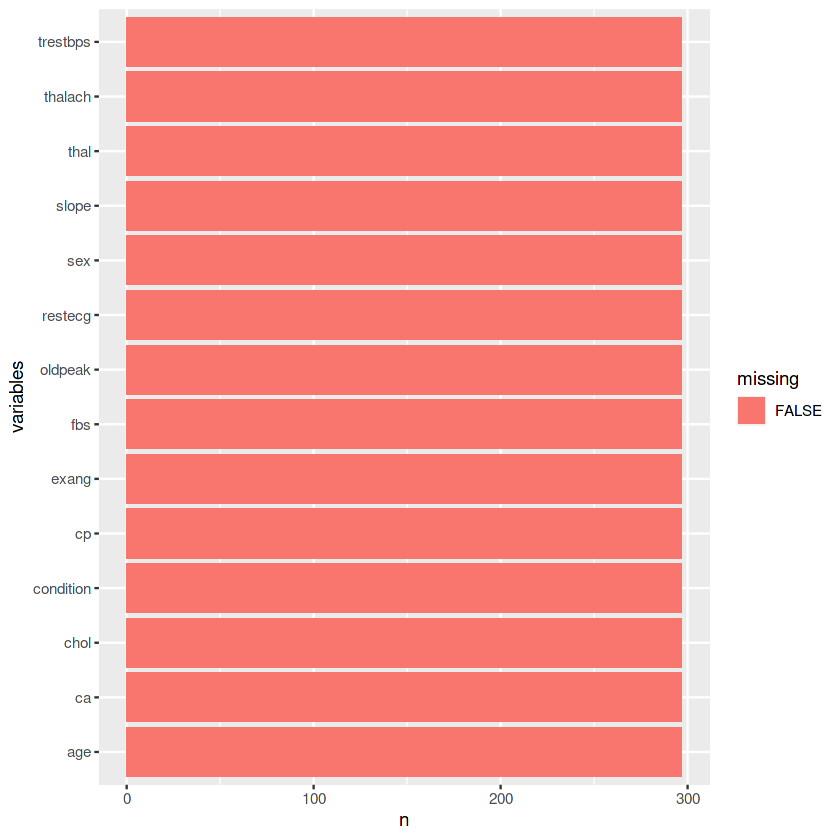

In [6]:
heart_df  %>%
  summarise_all(list(~is.na(.)))%>%
  pivot_longer(everything(),
               names_to = "variables", values_to="missing") %>%
  count(variables, missing) %>%
  ggplot(aes(y=variables,x=n,fill=missing))+
  geom_col()

From the above plot, we can see that our dataset heart_df has no missing values

**Correlation Plot**

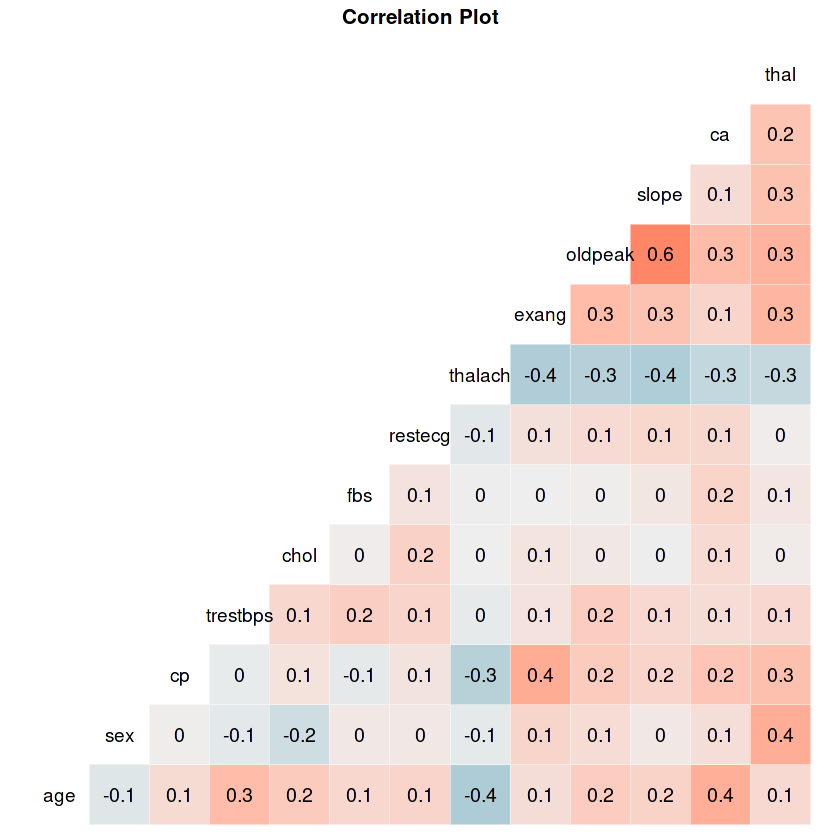

In [7]:
# Plotting the correlation of the variables minus the outcome variable

ggcorr(heart_df[,-14], name = "corr", label = TRUE)+

  theme(legend.position="none")+

labs(title="Correlation Plot")+

theme(plot.title=element_text(face='bold',color='black',hjust=0.5,size=12))


From Above, we can see that the pair oldpeak and slope are the only ones that have a correlation of above 50% i.e 60%. The rest have correlation of below 50%.

In [8]:
# Making afew changes to some of the variables that seem categorical in  nature for the purpose of visualization
#sex column 
heart_df$sex[heart_df$sex == 0] = "female"
heart_df$sex[heart_df$sex == 1] = "male"

#cp 
heart_df$cp[heart_df$cp==0] = "typical angina"
heart_df$cp[heart_df$cp==1] = "atypical angina"
heart_df$cp[heart_df$cp==2] = "non-anginal pain"
heart_df$cp[heart_df$cp==3] = "asymptomatic"

#fbs
heart_df$fbs[heart_df$fbs==0] = "false"
heart_df$fbs[heart_df$fbs==1] = "true"

#exang
heart_df$exang[heart_df$exang == 1] = "yes"
heart_df$exang[heart_df$exang == 0] = "no"

#restecg
heart_df$restecg[heart_df$restecg==0] = "Normal"
heart_df$restecg[heart_df$restecg==1] = "ST-T Wave abnormality"
heart_df$restecg[heart_df$restecg==2] = " Probable or definite left ventricular hypertrophy"

#slope
heart_df$slope[heart_df$slope == 0] = "upsloping"
heart_df$slope[heart_df$slope == 1] = "flat"
heart_df$slope[heart_df$slope == 2] = "downsloping"

#thal
heart_df$thal[heart_df$thal == 0] = "normal"
heart_df$thal[heart_df$thal == 1] = "fixed defect"
heart_df$thal[heart_df$thal == 2] = "reversible defect"

#condition
heart_df$condition[heart_df$condition == 0] = 'No disease'
heart_df$condition[heart_df$condition == 1] = 'Has disease'



head(heart_df, n = 6)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>
1,69,male,typical angina,160,234,true,Probable or definite left ventricular hypertrophy,131,no,0.1,flat,1,normal,No disease
2,69,female,typical angina,140,239,false,Normal,151,no,1.8,upsloping,2,normal,No disease
3,66,female,typical angina,150,226,false,Normal,114,no,2.6,downsloping,0,normal,No disease
4,65,male,typical angina,138,282,true,Probable or definite left ventricular hypertrophy,174,no,1.4,flat,1,normal,Has disease
5,64,male,typical angina,110,211,false,Probable or definite left ventricular hypertrophy,144,yes,1.8,flat,0,normal,No disease
6,64,male,typical angina,170,227,false,Probable or definite left ventricular hypertrophy,155,no,0.6,flat,0,reversible defect,No disease


**Contingency analysis / Chi-square test of independence**

A hypothesis test called contingency analysis is used to **determine whether two categorical variables are independent or not**. To put it another way, we're asking, "Can we foretell the value of one variable if we know the value of the other?" If the answer is true, we can conclude that the variables under examination are not independent. If the response is no, the variables under investigation are said to be independent. The exam is called as 'Contingency Analysis' since it makes use of contingency tables. Because the test statistic follows a chi-square distribution, it's also known as the 'Chi-square test of independence.' The test used to determine if two categorical variables are independent or not. The test's null hypothesis states that the two variables are independent, whereas the alternative hypothesis states that they are not.

We are going to use the built-in **chisq.test()** function to perform Chi-square test of independence. Firstly, we create a 2-way contingency table.

In [9]:
# creating a 2-way contingency table( between the predictive variables & the outcome variable, condition)
table_1 <- table(heart_df$sex, heart_df$condition)
table_1
chisq.test(table_1)

# cp & condition
table_2 <- table(heart_df$cp, heart_df$condition)
table_2
chisq.test(table_2)

# fbs & condition
table_3 <- table(heart_df$fbs, heart_df$condition)
table_3
chisq.test(table_3)

# restecg & condition
table_4 <- table(heart_df$restecg, heart_df$condition)
table_4
chisq.test(table_4)

# exang & condition
table_5 <- table(heart_df$exang, heart_df$condition)
table_5
chisq.test(table_5)

# slope & condition
table_6 <- table(heart_df$slope, heart_df$condition)
table_6
chisq.test(table_6)

# ca & condition
table_7 <- table(heart_df$ca, heart_df$condition)
table_7
chisq.test(table_7)

# thal & condition
table_8 <- table(heart_df$thal, heart_df$condition)
table_8
chisq.test(table_8)

        
         Has disease No disease
  female          25         71
  male           112         89


	Pearson's Chi-squared test with Yates' continuity correction

data:  table_1
X-squared = 21.852, df = 1, p-value = 2.946e-06


                  
                   Has disease No disease
  asymptomatic             103         39
  atypical angina            9         40
  non-anginal pain          18         65
  typical angina             7         16


	Pearson's Chi-squared test

data:  table_2
X-squared = 77.276, df = 3, p-value < 2.2e-16


       
        Has disease No disease
  false         117        137
  true           20         23


	Pearson's Chi-squared test with Yates' continuity correction

data:  table_3
X-squared = 1.9997e-31, df = 1, p-value = 1


                                                    
                                                     Has disease No disease
   Probable or definite left ventricular hypertrophy          79         67
  Normal                                                      55         92
  ST-T Wave abnormality                                        3          1

Warning message in chisq.test(table_4):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  table_4
X-squared = 9.5755, df = 2, p-value = 0.008331


     
      Has disease No disease
  no           63        137
  yes          74         23


	Pearson's Chi-squared test with Yates' continuity correction

data:  table_5
X-squared = 50.943, df = 1, p-value = 9.511e-13


             
              Has disease No disease
  downsloping          12          9
  flat                 89         48
  upsloping            36        103


	Pearson's Chi-squared test

data:  table_6
X-squared = 43.473, df = 2, p-value = 3.63e-10


   
    Has disease No disease
  0          45        129
  1          44         21
  2          31          7
  3          17          3


	Pearson's Chi-squared test

data:  table_7
X-squared = 72.301, df = 3, p-value = 1.373e-15


                   
                    Has disease No disease
  fixed defect               12          6
  normal                     37        127
  reversible defect          88         27


	Pearson's Chi-squared test

data:  table_8
X-squared = 82.46, df = 2, p-value < 2.2e-16


**Interpretations from the above contingency Analysis**

* From the above result, we can see that **p-value** is less than the **significance level (0.05)** for all the tables except table 3. Thus, we can **reject the null hypothesis** and conclude that the two variables (sex & condition (i.e having the disease or not)) are **not independent** that is there exists an association between the 2 variables. The same can be said with the variables chest pain, resting electrocardiogram, exercise induced angina, the slope of the peak exercise ST segment, ca and thal all having a p-value of less than 0.05 hence having an association with the outcome variable condition.

* We can see a warning present itself that is, **"Chi-squared approximation may be incorrect"**, when tried to determine whether the two variable **fasting blood sugar and condition (table_3)** are independent or not. chisq.test function throws the above warning whenever one of the expected counts is lower than 5. In this case, we will add the option “correct = FALSE” as the second argument in the chisq.test() function to tell R to not do a Yate’s correction, which can be overly conservative. Let us see what the output will be when we make this change.

In [10]:
chisq.test(table_3, correct=FALSE)


	Pearson's Chi-squared test

data:  table_3
X-squared = 0.0029786, df = 1, p-value = 0.9565


The previous warning is no longer present and we can see that the p-value is greater than the level of significance 0.05, thus we do not reject the null hypothesis that states that the two variables are independent that is there is no association between fasting blood sugar and the outcome variable condition.

In [11]:
# converting categorical variable variables from character datatype  to factor datatype
cols <- c('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition')

for (col in cols) {
  heart_df[, col] <- as.factor(heart_df[, col])
}

str(heart_df)

'data.frame':	297 obs. of  14 variables:
 $ age      : int  69 69 66 65 64 64 63 61 60 59 ...
 $ sex      : Factor w/ 2 levels "female","male": 2 1 1 2 2 2 2 2 1 2 ...
 $ cp       : Factor w/ 4 levels "asymptomatic",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ trestbps : int  160 140 150 138 110 170 145 134 150 178 ...
 $ chol     : int  234 239 226 282 211 227 233 234 240 270 ...
 $ fbs      : Factor w/ 2 levels "false","true": 2 1 1 2 1 1 2 1 1 1 ...
 $ restecg  : Factor w/ 3 levels " Probable or definite left ventricular hypertrophy",..: 1 2 2 1 1 1 1 2 2 1 ...
 $ thalach  : int  131 151 114 174 144 155 150 145 171 145 ...
 $ exang    : Factor w/ 2 levels "no","yes": 1 1 1 1 2 1 1 1 1 1 ...
 $ oldpeak  : num  0.1 1.8 2.6 1.4 1.8 0.6 2.3 2.6 0.9 4.2 ...
 $ slope    : Factor w/ 3 levels "downsloping",..: 2 3 1 2 2 2 1 2 3 1 ...
 $ ca       : Factor w/ 4 levels "0","1","2","3": 2 3 1 2 1 1 1 3 1 1 ...
 $ thal     : Factor w/ 3 levels "fixed defect",..: 2 2 2 2 2 3 1 2 2 3 ...
 $ condition: Factor w/

**We will start to visualize & explore categorical variables**

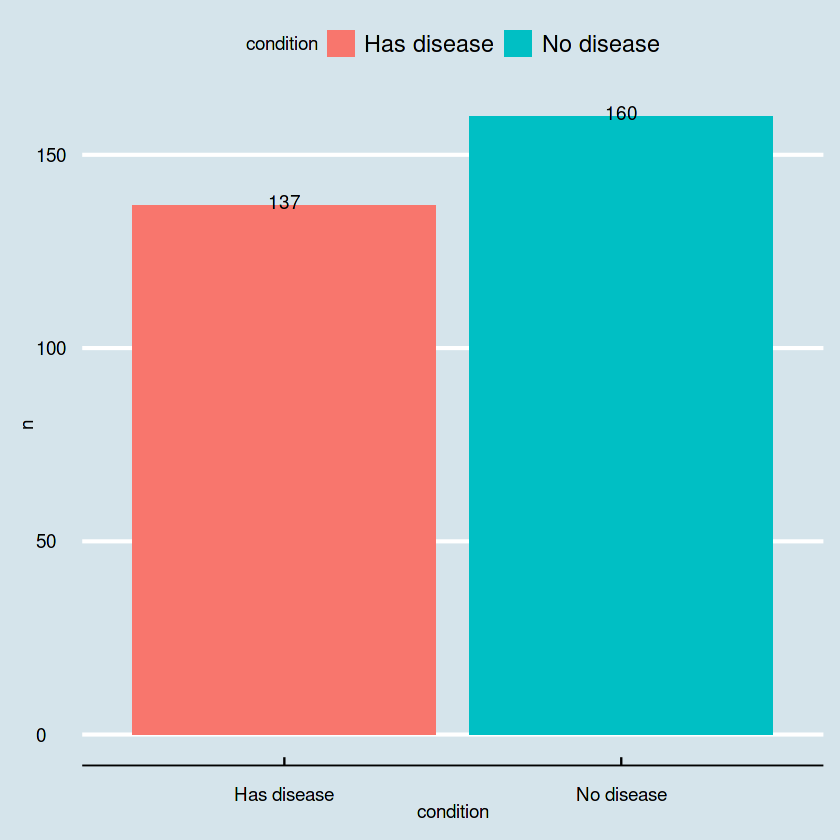

In [12]:
heart_df %>% group_by(condition) %>% summarise(n = n()) %>% ggplot(aes(condition, n, fill = condition)) + geom_col() + geom_text(aes(label = n), position = position_dodge(width = 1), vjust = 0.25) + theme_economist()

Based on the plot above, it is clear that the dataset is **NOT experiencing imbalanced classification** which is a supervised learning problem where one class outnumbers other class by a large proportion. This problem is faced more frequently in binary classification problems than multi-level classification problems. The term **imbalanced** refer to the disparity encountered in the dependent (response) variable (in our case the response variable, condition). Thus, an imbalanced classification problem is one in which the response variable has imbalanced proportion of classes. In other words, a data set that exhibits an unequal distribution between its classes is considered to be imbalanced.

`summarise()` has grouped output by 'fbs'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'restecg'. You can override using the
`.groups` argument.


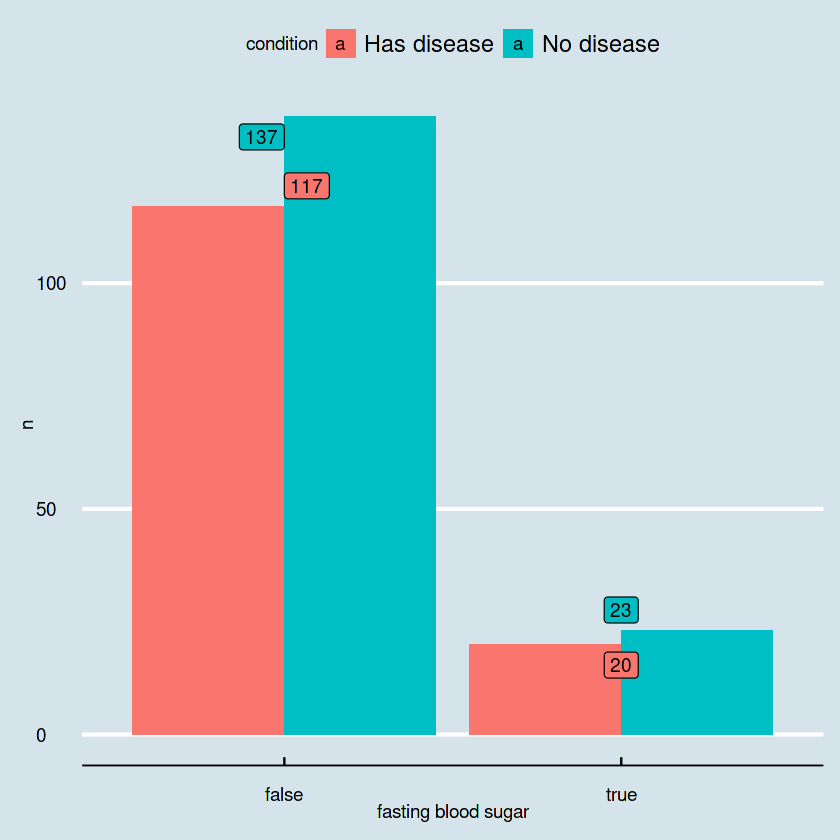

`summarise()` has grouped output by 'exang'. You can override using the
`.groups` argument.


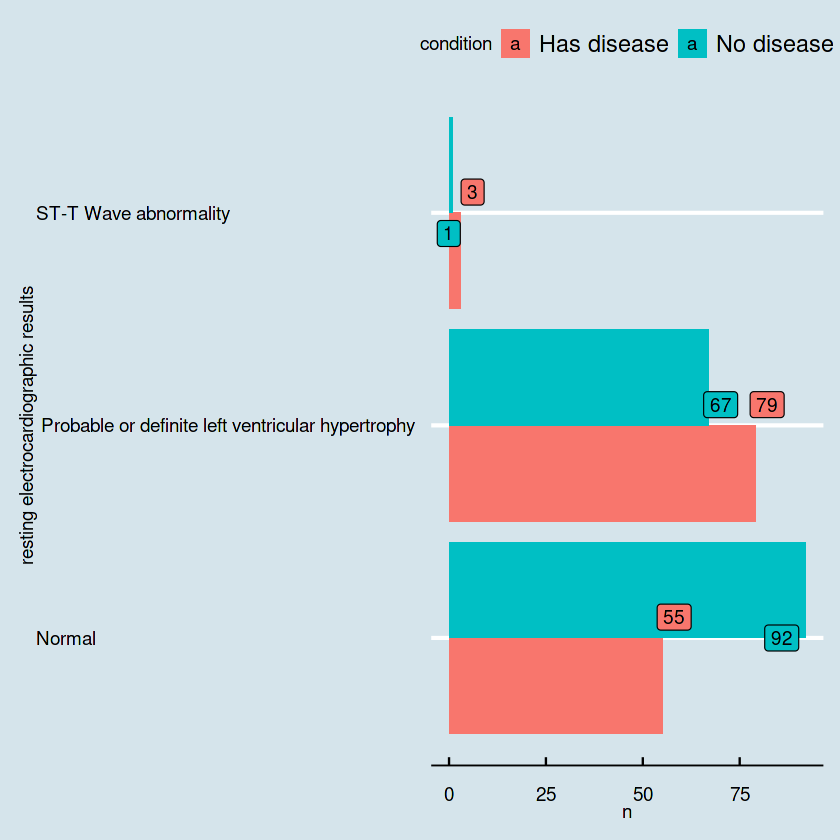

`summarise()` has grouped output by 'slope'. You can override using the
`.groups` argument.


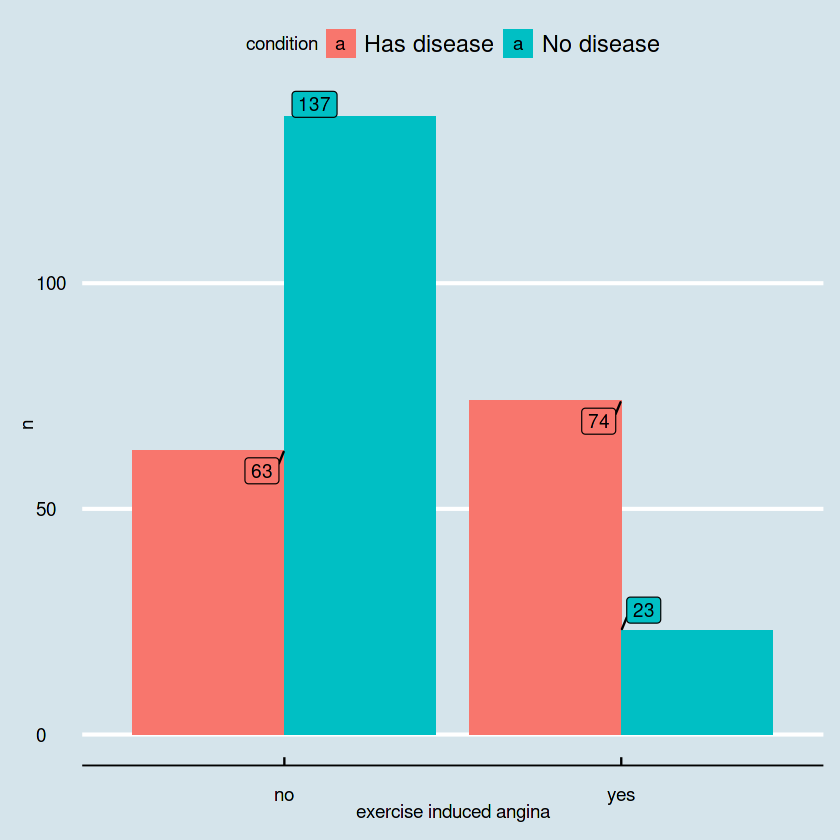

`summarise()` has grouped output by 'ca'. You can override using the `.groups`
argument.


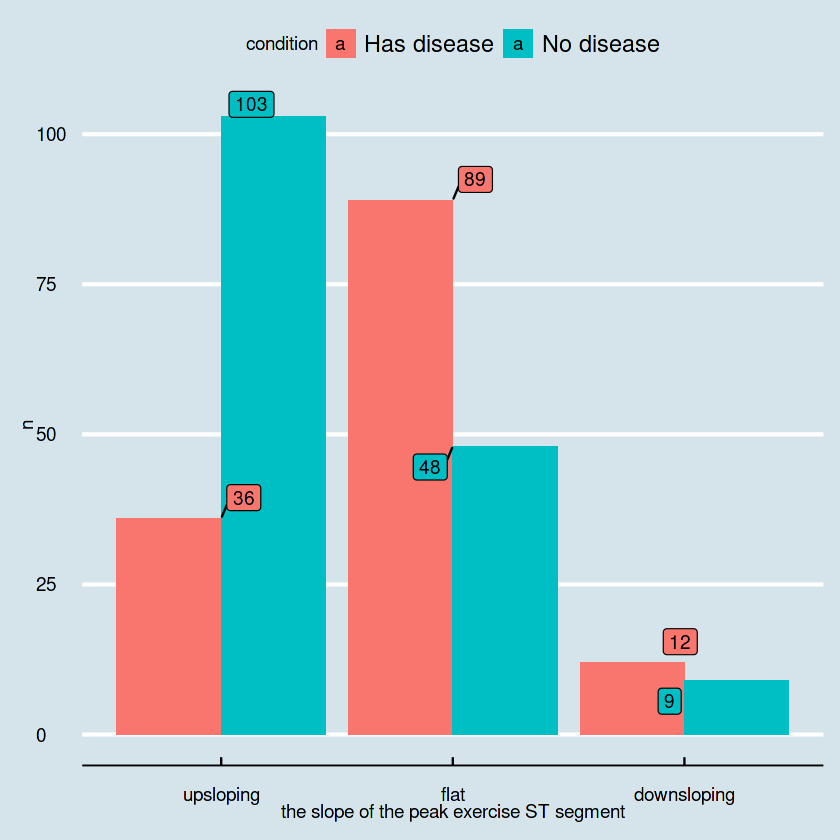

`summarise()` has grouped output by 'thal'. You can override using the
`.groups` argument.


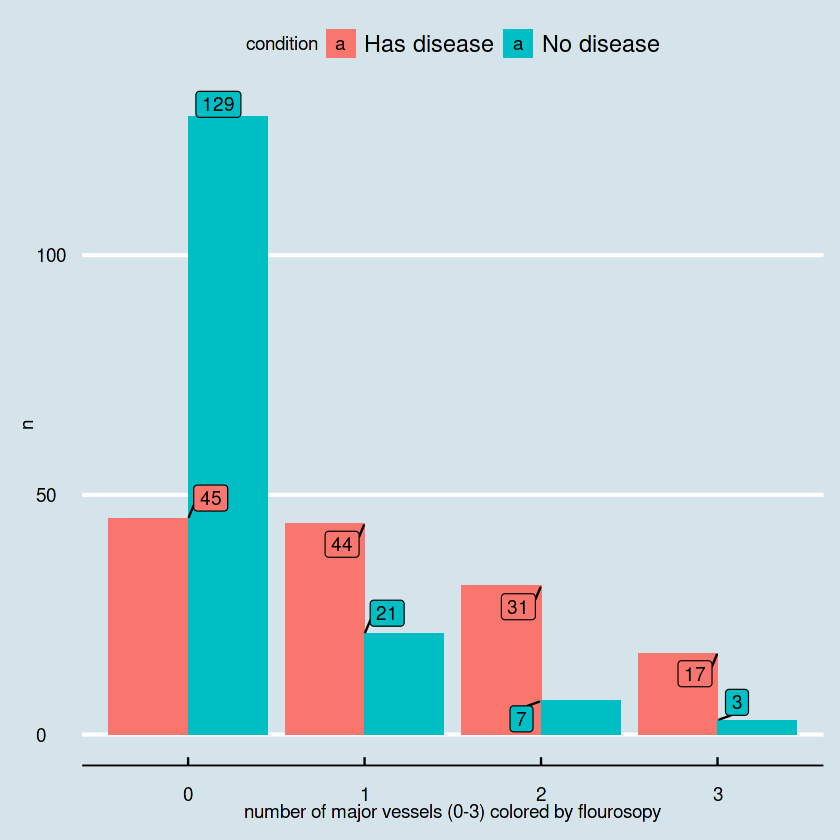

`summarise()` has grouped output by 'sex'. You can override using the `.groups`
argument.


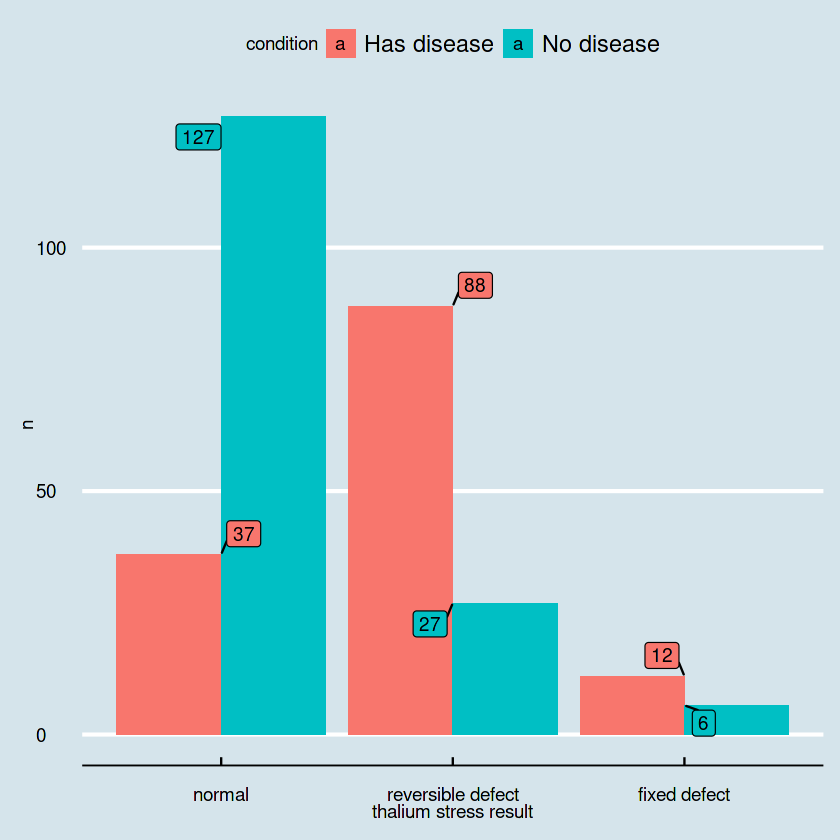

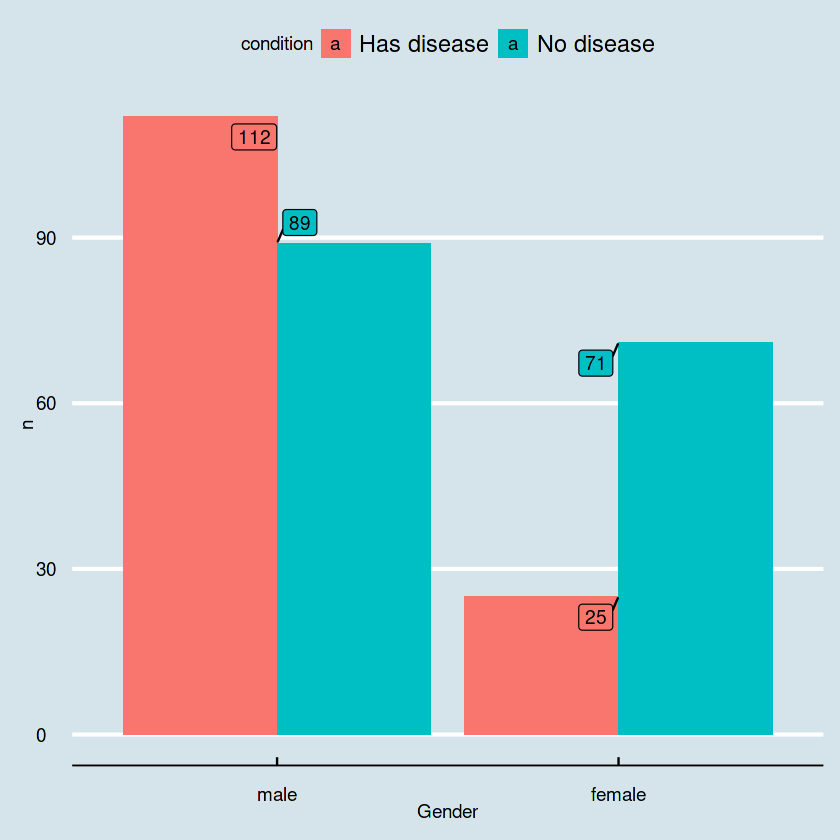

In [13]:
heart_df %>% group_by(fbs, condition) %>% summarise(n = n()) %>% ggplot(aes(x = reorder(fbs, -n), y = n, fill = condition)) + geom_col(position = 'dodge') + geom_label_repel(aes(label = n)) + labs(x = "fasting blood sugar") + theme_economist()
heart_df %>% group_by(restecg, condition) %>% summarise(n = n()) %>% ggplot(aes(x = reorder(restecg, -n), y = n, fill =  condition)) + geom_col(position = 'dodge') + geom_label_repel(aes(label = n)) + labs(x = "resting electrocardiographic results") + coord_flip() + theme_economist() 
heart_df %>% group_by(exang, condition) %>% summarise(n = n()) %>% ggplot(aes(x = reorder(exang, -n), y = n, fill =  condition)) + geom_col(position = 'dodge') + geom_label_repel(aes(label = n)) + labs(x = "exercise induced angina") + theme_economist()
heart_df %>% group_by(slope, condition) %>% summarise(n = n()) %>% ggplot(aes(x = reorder(slope, -n), y = n, fill =  condition)) + geom_col(position = 'dodge') + geom_label_repel(aes(label = n)) + labs(x = "the slope of the peak exercise ST segment") + theme_economist()
heart_df %>% group_by(ca, condition) %>% summarise(n = n()) %>% ggplot(aes(x = reorder(ca, -n), y = n, fill =  condition)) + geom_col(position = 'dodge') + geom_label_repel(aes(label = n)) + labs(x = "number of major vessels (0-3) colored by flourosopy") + theme_economist()
heart_df %>% group_by(thal, condition) %>% summarise(n = n()) %>% ggplot(aes(x = reorder(thal, -n), y = n, fill =  condition)) + geom_col(position = 'dodge') + geom_label_repel(aes(label = n)) + labs(x = "thalium stress result") + theme_economist()
heart_df %>% group_by(sex, condition) %>% summarise(n = n()) %>% ggplot(aes(x = reorder(sex, -n), y = n, fill = condition)) + geom_col(position = 'dodge') + geom_label_repel(aes(label = n)) + labs(x = "Gender") + theme_economist()

**Interpretation of the visualizations above**

* There are less people who have heart disease in the dataset.
* From the looks of it, there are less people who have fasting blood sugar > 120 mg/dL i.e(majority is false) than those who have fasting blood sugar > 120 mg/dL (likely to be diabetic). 
* People who are showing probable or definite left ventricular hypertrophy by Estes' criteria as their resting electrocardiogram results take the lead when it comes to having heart disease. Followed by the category of normal resting electrocardiogram results. Then those having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) having 3 individuals with the disease. etc

**Let's now visualize and explore the numeric data**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



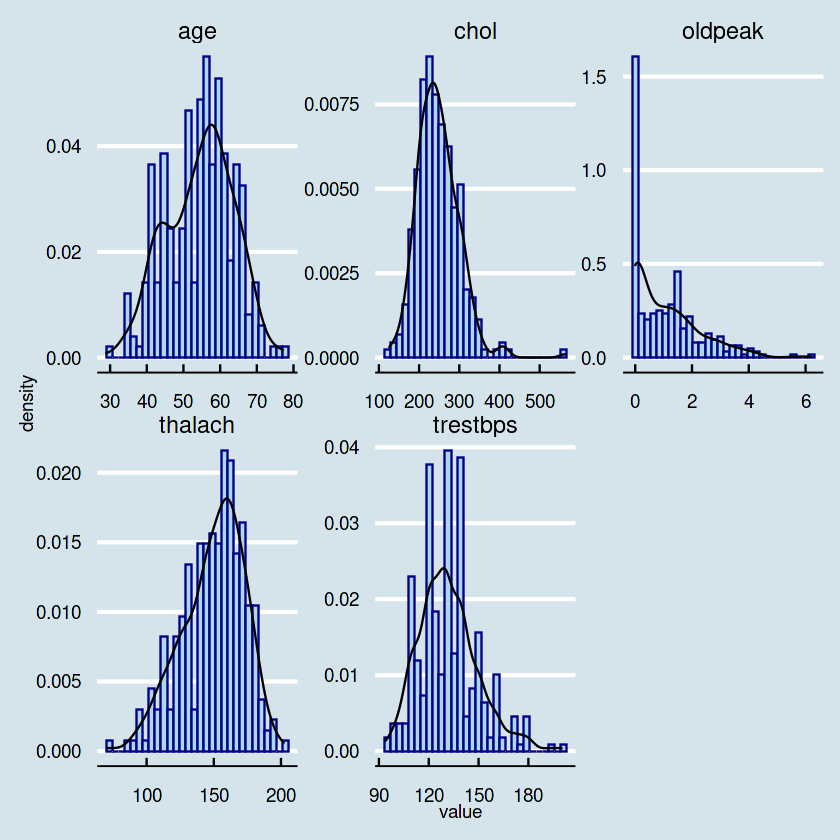

In [14]:
#visualizing the numerical variables 
#Histogram with a density plot
heart_df %>% 
         keep(is.numeric) %>%  # keeping only numerical column
         gather() %>%          # Convert to key-value pair
         ggplot(aes(value)) +    # plot the values
           facet_wrap(~key, scale = "free") + # in separate panel
           geom_histogram(aes(y = ..density..), color = "darkblue", fill = "lightblue") + geom_density(alpha = 0.2) + theme_economist()

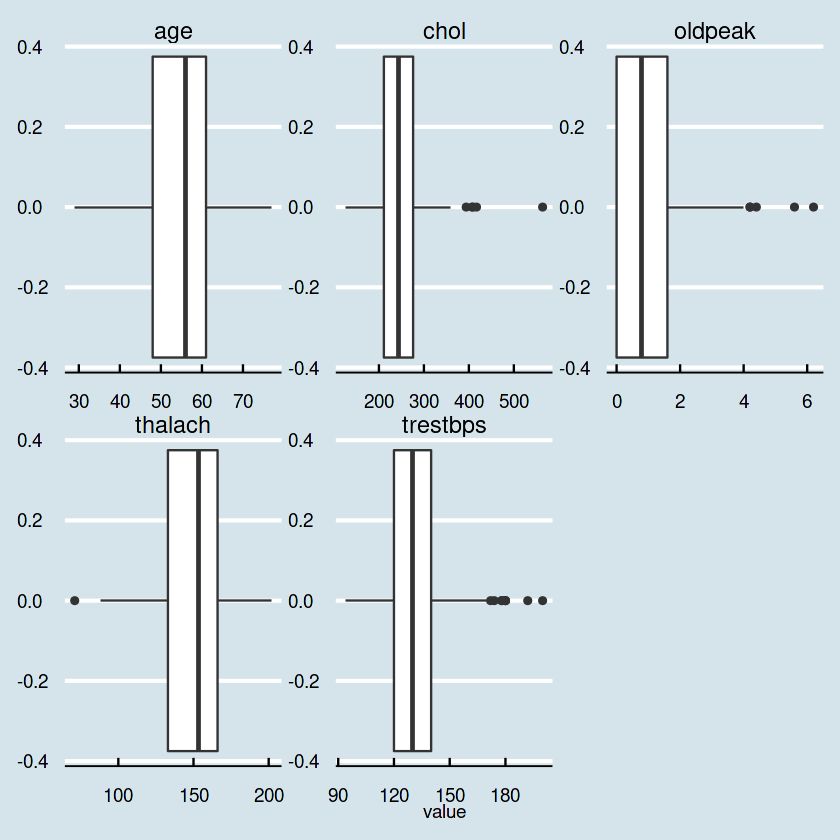

In [15]:
#boxplot
heart_df %>% 
         keep(is.numeric) %>%  # keeping only numerical column
         gather() %>%          # Convert to key-value pair
         ggplot(aes(value)) +    # plot the values
           facet_wrap(~key, scale = "free") + # in separate panel
           geom_boxplot() + theme_economist()

Since we are going to use tree-based models, we don't need to worry about these outliers because the one of the advantages of these models is that the are **robust to outliers**.

# Classification with tidymodels.

In [16]:
#Coverting the outcome variable to a factor
# Using the duplicate dataframe called heart
heart[, 'condition'] <- as.factor(heart_df[, 'condition'])
class(heart$condition)

[1] "factor"

In [17]:
#Set seed for reproducibility
set.seed(9876)


# Creating the balanced data split
heart_split <- initial_split(heart, prop = 0.70, strata = condition)

# Extracting the training and test set
heart_train <- training(heart_split)
heart_test  <- testing(heart_split)

# 1. Random Forest

Random forests are particularly suited for high-dimensional data. As a result of their ease-of-use and out-of-the-box performance, random forest is a very popular machine learning algorithm and is implemented in a variety of packages, like the **ranger or randomForest package**.

**Going to assess model performance in terms of the metric of ROC's Area under the curve(AUC). ROC curves and the AUC are useful for comparing different classifiers, since they take into account all possible thresholds.**

The Receiver Operating Characteristics (ROC) plot is a popular measure for evaluating classifier performance.

First, we are going to **Specifying a random forest model** To run the random forest algorithm you will use the **rand_forest()** function from the **parsnip package**. Let's take a look at this call. The hyperparameters here are: mtry, the number of predictors seen at each node (the default is the square root of total predictors), trees, the size of your forest, and min_n - it's the smallest node size allowed. As usual, we will set the mode using **set_mode()** and the engine using **set_engine()**. You can use the ranger engine or the randomForest engine here.

We will use **tune()** to flag hyperparameters for tuning in our specification. We chose to tune all the hyperparameter except **mtry**.

Then, we need a grid containing all hyperparameter combinations that we want to try. grid_regular() creates an evenly-spaced grid of all the hyperparameters. It takes the tuning parameters, which we extract by applying the function parameters() to our dummy specification, and the levels, which is the number of levels each tuning parameter should get. Let's specify 12 levels for each of our two tuning parameters. 



In [18]:
# Specifying a random forest
RF_spec <- rand_forest(mtry = 4, trees = tune(), min_n = tune()) %>%
    set_mode("classification") %>%
    set_engine('ranger', importance = "impurity")




# Creating the tuning grid
tunegrid_RF <- grid_regular(parameters(RF_spec), 
                      levels = 12)

tunegrid_RF

Warning message:
“`parameters.model_spec()` was deprecated in tune 0.1.6.9003.
Please use `hardhat::extract_parameter_set_dials()` instead.”


trees,min_n
<int>,<int>
1,2
182,2
364,2
546,2
727,2
909,2
1091,2
1273,2
1454,2


Next, the tune_grid() function takes the dummy specification, the model formula, the resamples, which are some cross-validation folds, a tuning grid, and a list of metrics. In our case, the dummy specification is RF_spec, the model formula is "condition is modeled as a function of all other variables", resamples is six folds of the training data heart_train, the tuning grid is tunegrid_RF, and metrics is a metric_set containing only the roc_auc metric. The optimal hyperparameter combination can be extracted using select_best(). Then, we plug the results from select_best() into the specification containing the placeholders using finalize_model(). This finalizes your specification after tuning.

trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,2,roc_auc,binary,0.7241005,6,0.040227733,Preprocessor1_Model001
182,2,roc_auc,binary,0.8989261,6,0.004112111,Preprocessor1_Model002
364,2,roc_auc,binary,0.8963191,6,0.007640149,Preprocessor1_Model003
546,2,roc_auc,binary,0.8979400,6,0.007358912,Preprocessor1_Model004
727,2,roc_auc,binary,0.8952615,6,0.007895063,Preprocessor1_Model005
909,2,roc_auc,binary,0.8959027,6,0.007649407,Preprocessor1_Model006
1091,2,roc_auc,binary,0.8930135,6,0.006943422,Preprocessor1_Model007
1273,2,roc_auc,binary,0.8922382,6,0.007578698,Preprocessor1_Model008
1454,2,roc_auc,binary,0.8950160,6,0.008592813,Preprocessor1_Model009


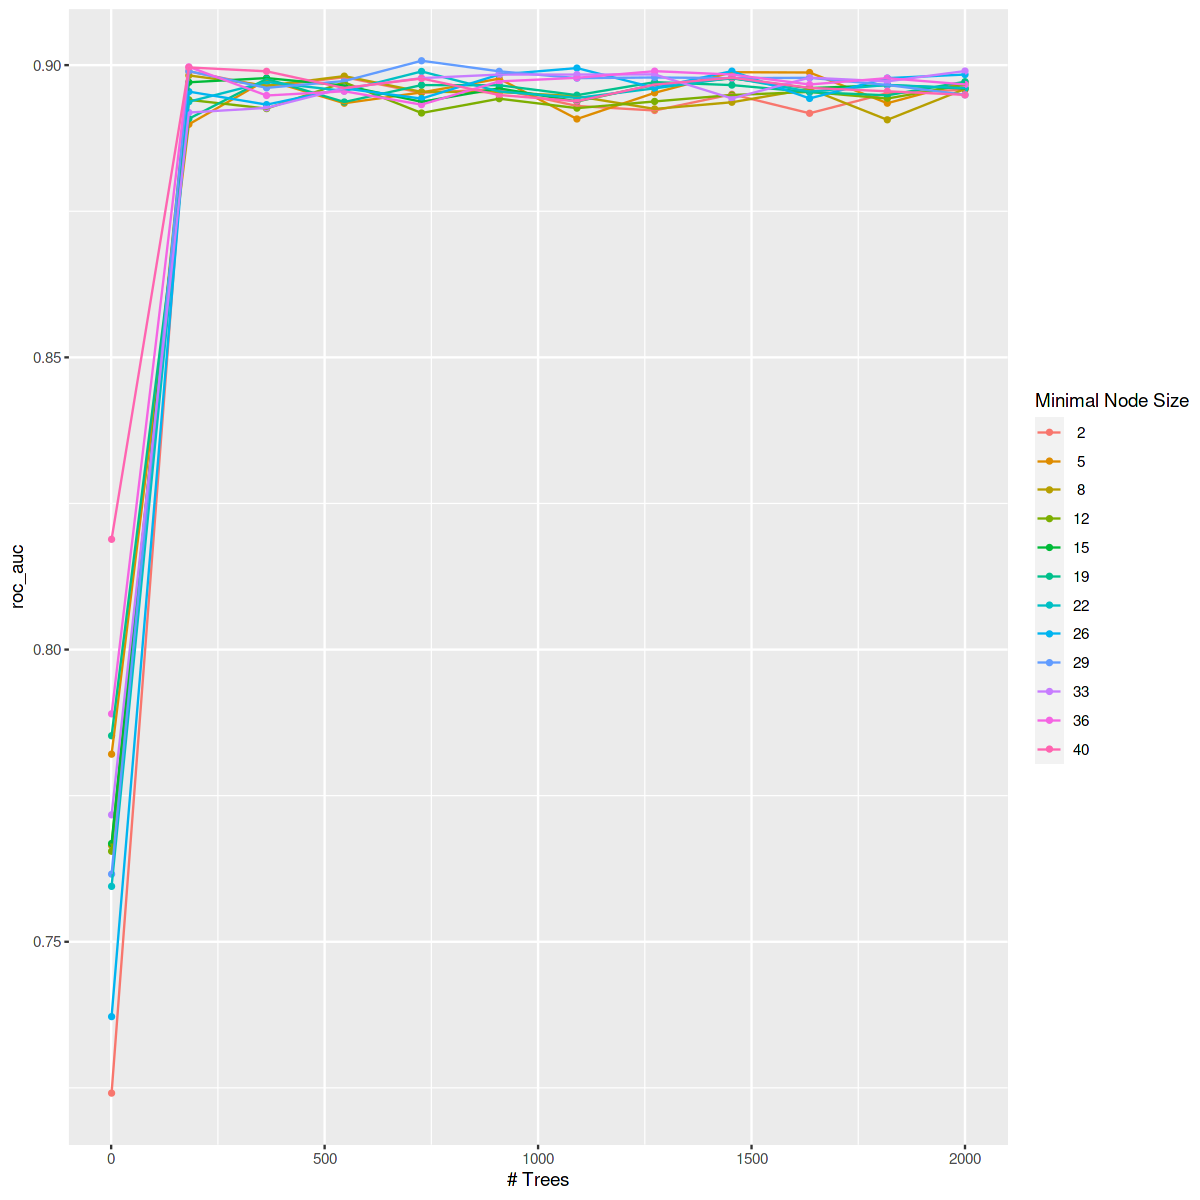

In [19]:
options(repr.plot.width = 10, repr.plot.height = 10)

# enabling parallel processing on 6 threads to speed up tuning
doParallel::registerDoParallel(cores = 6)

# Setting seed for reproducibility
set.seed(2000)

# Creating CV folds of training data
Folds <- vfold_cv(heart_train, v = 6)

# Tuning along the grid
Tune_results <- tune_grid(RF_spec,
                    condition ~ .,
                    resamples = Folds,
                    grid = tunegrid_RF,
                    metrics = metric_set(roc_auc))

# Checking the result of tuning hyperparameters
Tune_results %>% collect_metrics() %>%
  head(n= 20)



# Ploting the results
autoplot(Tune_results)

Once this computation is complete (which can take a while even with parallel processing enabled via registerDoParallel()), we can look at the best performing hyperparameters w.r.t. a metric we specified earlier i.e roc_auc.

In [20]:
# Showing the best combination of hyperparameters 
show_best_params <- show_best(Tune_results, n =1)

show_best_params
# Selecting the final hyperparameters
Best_params <- select_best(Tune_results)

Best_params


# Finalizing the specification
Final_spec <- finalize_model(RF_spec, Best_params)

Final_spec


# Training the final model on the full training data
final_RF_model <- Final_spec %>% fit(condition ~ ., heart_train)


final_RF_model

trees,min_n,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
727,29,roc_auc,binary,0.9007511,6,0.01333687,Preprocessor1_Model101


trees,min_n,.config
<int>,<int>,<chr>
727,29,Preprocessor1_Model101


Random Forest Model Specification (classification)

Main Arguments:
  mtry = 4
  trees = 727
  min_n = 29

Engine-Specific Arguments:
  importance = impurity

Computational engine: ranger 


parsnip model object

Ranger result

Call:
 ranger::ranger(x = maybe_data_frame(x), y = y, mtry = min_cols(~4,      x), num.trees = ~727L, min.node.size = min_rows(~29L, x),      importance = ~"impurity", num.threads = 1, verbose = FALSE,      seed = sample.int(10^5, 1), probability = TRUE) 

Type:                             Probability estimation 
Number of trees:                  727 
Sample size:                      207 
Number of independent variables:  13 
Mtry:                             4 
Target node size:                 29 
Variable importance mode:         impurity 
Splitrule:                        gini 
OOB prediction error (Brier s.):  0.1348912 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.8854167


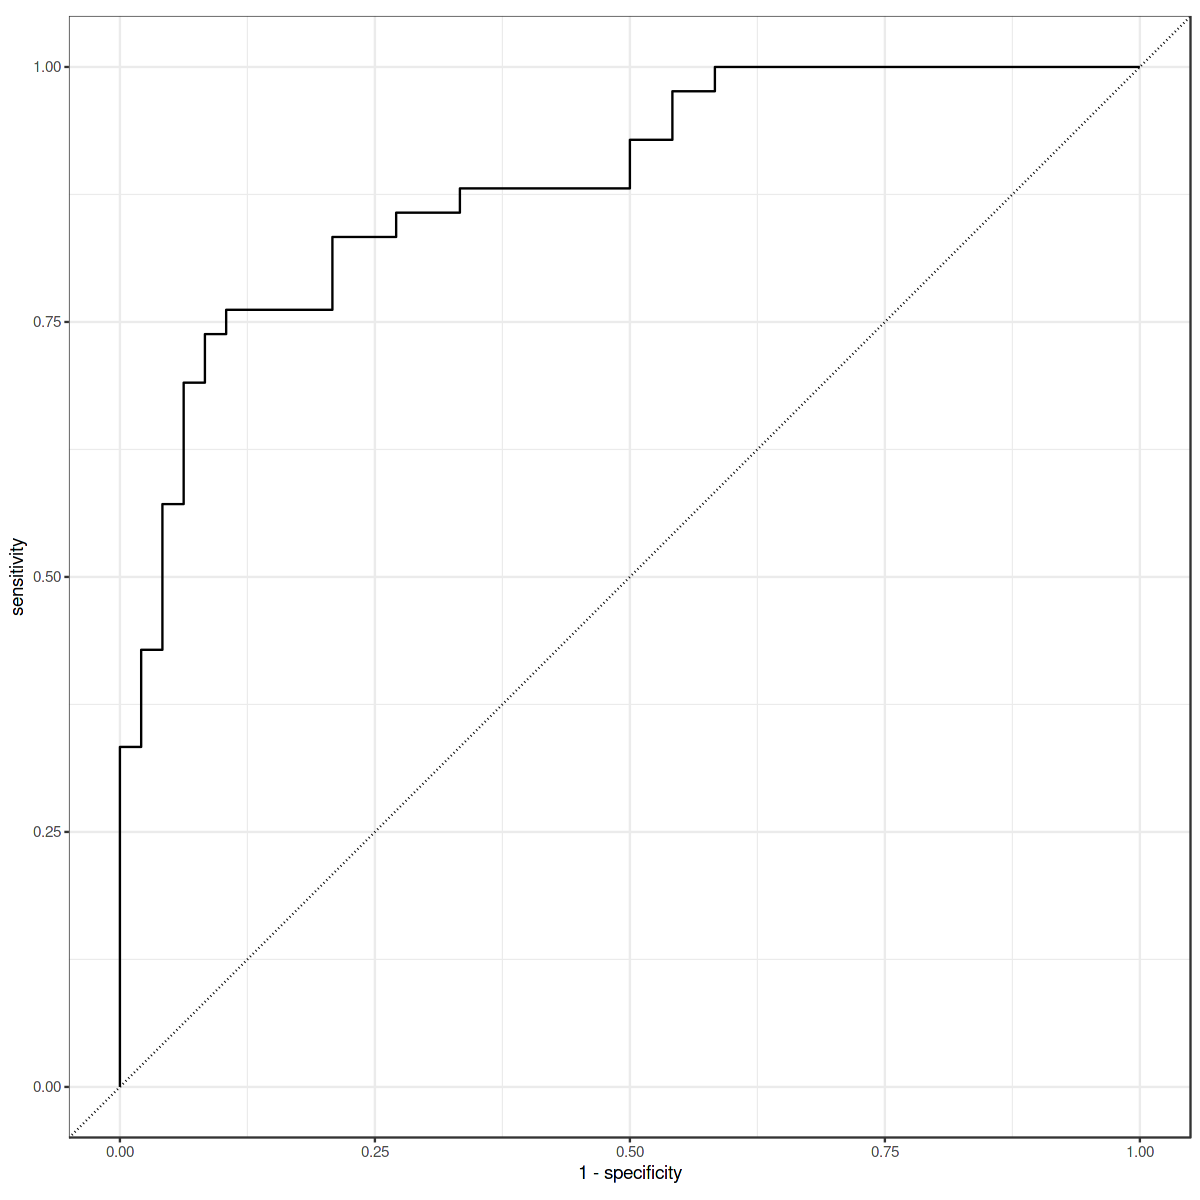

In [21]:
# Set seed for reproducibility
set.seed(51)

# Predicting on test set and add to training set
Predictions_1 <- predict(final_RF_model,
                   new_data = heart_test, 
                   type = "prob") %>%  janitor::clean_names() %>%
   mutate(true_class = heart_test$condition)

    

# Creating and plot the ROC curve
roc_curve(Predictions_1,
          estimate = pred_has_disease,
          truth = true_class) %>% autoplot()


# Calculating the AUC
roc_auc(Predictions_1,
    estimate = pred_has_disease, 
    truth = true_class)

**Confusion Matrix**

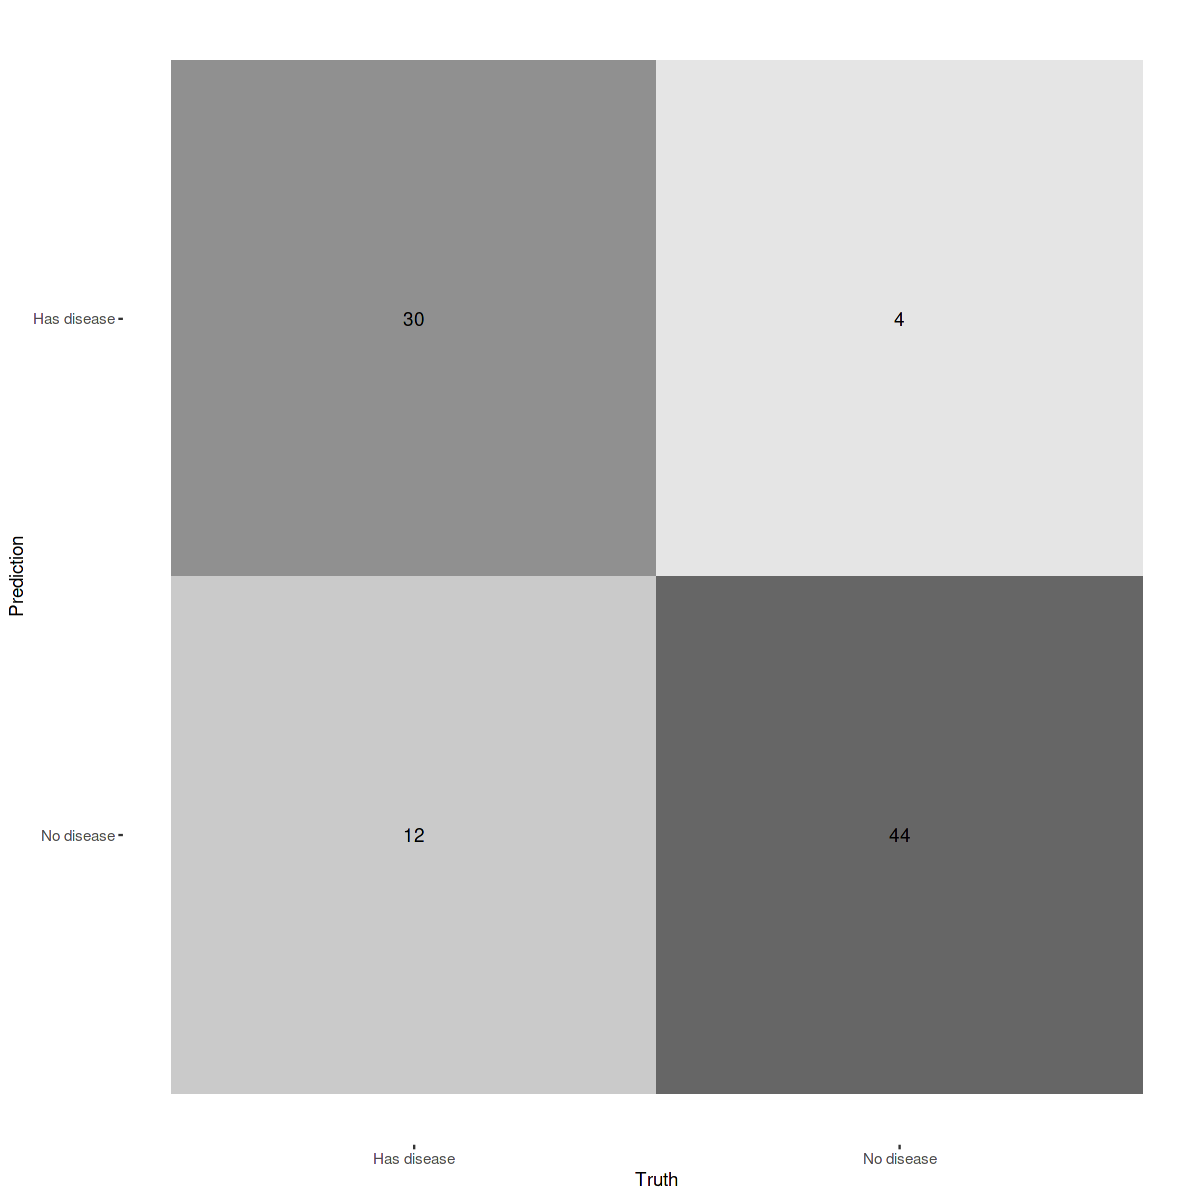

In [22]:
#Predicting outcome categories and then Combining with the test so as to construct the confusion matrix

prediction_2 <- predict(final_RF_model,
                   new_data = heart_test, 
                   type = "class") %>%  janitor::clean_names() %>%
   mutate(true_class = heart_test$condition)

    
conf_mat(prediction_2,
         truth = true_class,
         estimate = pred_class) %>% 
  # Create a heat map
  autoplot(type = 'heatmap')


**Checking other metrics**

In [23]:
# Using the confusion matrix to view other metrics like precision, recall etc by passing the summary() function
metrics <- conf_mat(prediction_2,
         truth = true_class,
         estimate = pred_class) %>% 
  # Passing to the summary() function
  summary()

metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8222222
kap,binary,0.6385542
sens,binary,0.7142857
spec,binary,0.9166667
ppv,binary,0.8823529
npv,binary,0.7857143
mcc,binary,0.6492446
j_index,binary,0.6309524
bal_accuracy,binary,0.8154762


**Variable importance**

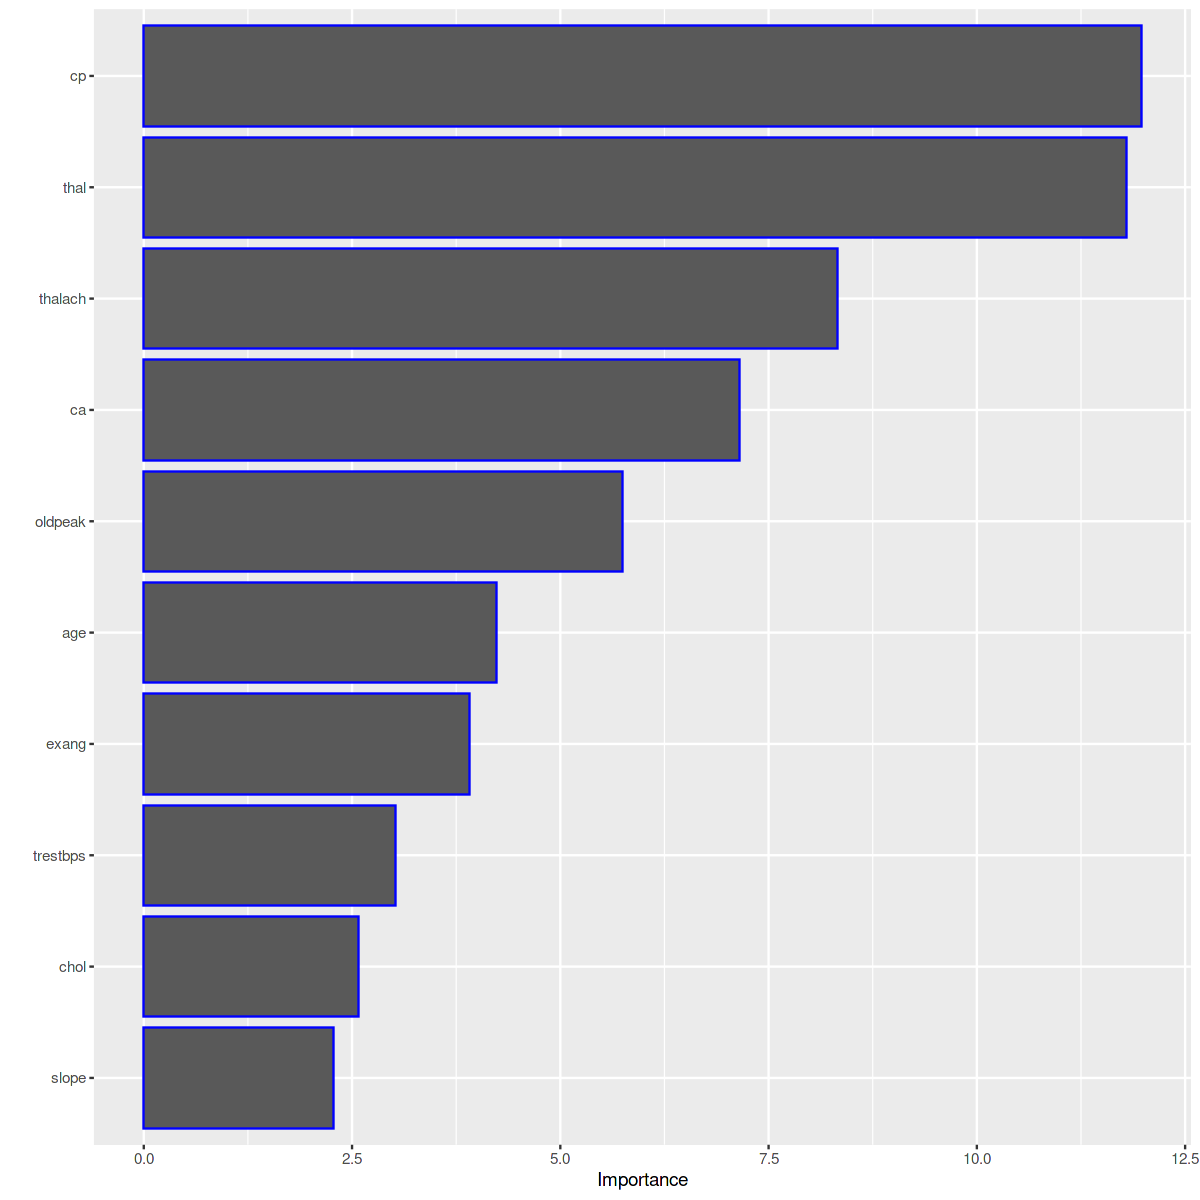

In [24]:
# Plot the variable importance
vip::vip(final_RF_model, aesthetics = list(color = 'blue'))

# 2. Gradient Boosting

We will follow the same steps we took with the random forest model, making changes where necessary.

In [25]:
# Creating the specification with placeholders
boost_spec <- boost_tree(
                trees = tune(),
                learn_rate = tune(),
                tree_depth = tune(),
                sample_size = tune()) %>%
  set_mode('classification') %>%
  set_engine('xgboost')

# Creating the tuning grid
tunegrid_boost <- grid_regular(parameters(boost_spec), 
                      levels = 9)

tunegrid_boost

Warning message:
“`parameters.model_spec()` was deprecated in tune 0.1.6.9003.
Please use `hardhat::extract_parameter_set_dials()` instead.”


trees,tree_depth,learn_rate,sample_size
<int>,<int>,<dbl>,<dbl>
1,1,0.001,0.1
250,1,0.001,0.1
500,1,0.001,0.1
750,1,0.001,0.1
1000,1,0.001,0.1
1250,1,0.001,0.1
1500,1,0.001,0.1
1750,1,0.001,0.1
2000,1,0.001,0.1


trees,tree_depth,learn_rate,sample_size,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,1,0.001,0.1000,roc_auc,binary,0.6584441,6,0.04066257,Preprocessor1_Model0001
250,1,0.001,0.1000,roc_auc,binary,0.9070220,6,0.01750803,Preprocessor1_Model0002
500,1,0.001,0.1000,roc_auc,binary,0.9033388,6,0.01752203,Preprocessor1_Model0003
750,1,0.001,0.1000,roc_auc,binary,0.9069645,6,0.01629973,Preprocessor1_Model0004
1000,1,0.001,0.1000,roc_auc,binary,0.9053742,6,0.01781497,Preprocessor1_Model0005
1250,1,0.001,0.1000,roc_auc,binary,0.9047789,6,0.01757279,Preprocessor1_Model0006
1500,1,0.001,0.1000,roc_auc,binary,0.9034819,6,0.01797550,Preprocessor1_Model0007
1750,1,0.001,0.1000,roc_auc,binary,0.9048155,6,0.01904804,Preprocessor1_Model0008
2000,1,0.001,0.1000,roc_auc,binary,0.9042182,6,0.01868950,Preprocessor1_Model0009


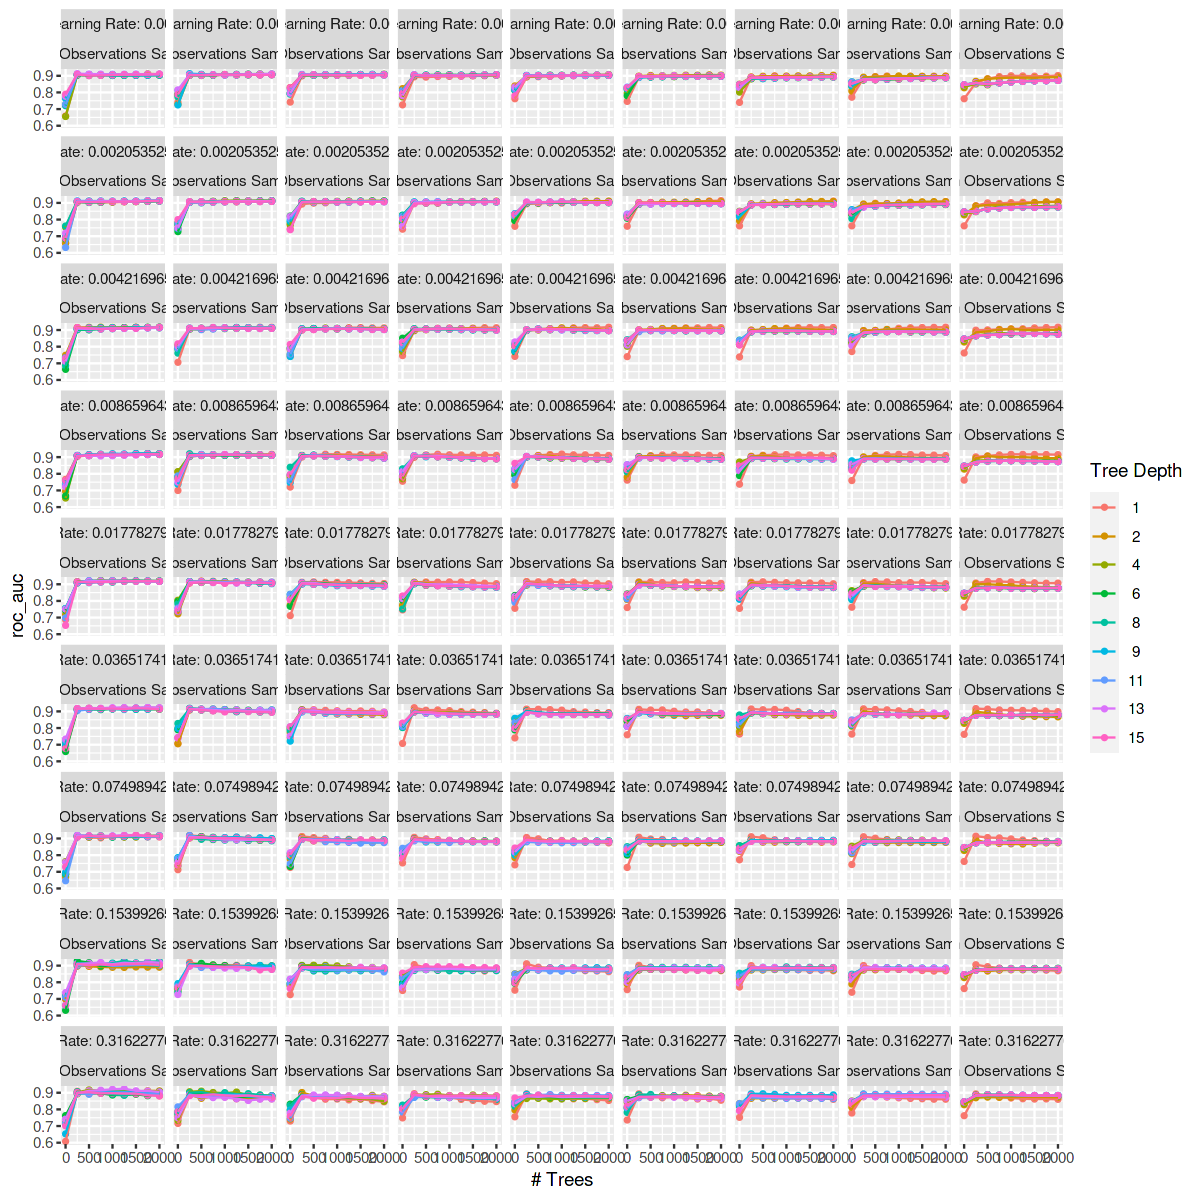

In [26]:
options(repr.plot.width = 10, repr.plot.height = 10)

# enabling parallel processing on 6 threads to speed up tuning
doParallel::registerDoParallel(cores = 6)


# Set seed for reproducibility
set.seed(4605)

# Creating CV folds of training data
folds <- vfold_cv(heart_train, v = 6)

# Tuning along the grid
tune_results <- tune_grid(boost_spec,
                    condition ~ .,
                    resamples = folds,
                    grid = tunegrid_boost,
                    metrics = metric_set(roc_auc))

# Checking the result of tuning hyperparameters
tune_results %>% collect_metrics() %>%
  head(n = 10)





# Ploting the results
autoplot(tune_results)

In [27]:
# Showing the best combination of hyperparameters 
Show_best_params <- show_best(tune_results, n =1)

Show_best_params



# Selecting the final hyperparameters
best_params <- select_best(tune_results)

best_params


# Finalizing the specification
final_spec <- finalize_model(boost_spec, best_params)

final_spec

# Training the final model on the full training data
final_gb_model <- final_spec %>% fit(condition ~ ., heart_train)

final_gb_model

trees,tree_depth,learn_rate,sample_size,.metric,.estimator,mean,n,std_err,.config
<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
250,6,0.1539927,0.1,roc_auc,binary,0.9285998,6,0.02067877,Preprocessor1_Model2756


trees,tree_depth,learn_rate,sample_size,.config
<int>,<int>,<dbl>,<dbl>,<chr>
250,6,0.1539927,0.1,Preprocessor1_Model2756


Boosted Tree Model Specification (classification)

Main Arguments:
  trees = 250
  tree_depth = 6
  learn_rate = 0.153992652605949
  sample_size = 0.1

Computational engine: xgboost 


parsnip model object

##### xgb.Booster
raw: 185.1 Kb 
call:
  xgboost::xgb.train(params = list(eta = 0.153992652605949, max_depth = 6L, 
    gamma = 0, colsample_bytree = 1, colsample_bynode = 1, min_child_weight = 1, 
    subsample = 0.1, objective = "binary:logistic"), data = x$data, 
    nrounds = 250L, watchlist = x$watchlist, verbose = 0, nthread = 1)
params (as set within xgb.train):
  eta = "0.153992652605949", max_depth = "6", gamma = "0", colsample_bytree = "1", colsample_bynode = "1", min_child_weight = "1", subsample = "0.1", objective = "binary:logistic", nthread = "1", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.evaluation.log()
# of features: 13 
niter: 250
nfeatures : 13 
evaluation_log:
    iter training_logloss
       1        0.6634529
       2        0.6287577
---                      
     249        0.2960862
     250        0.2933974

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.8809524


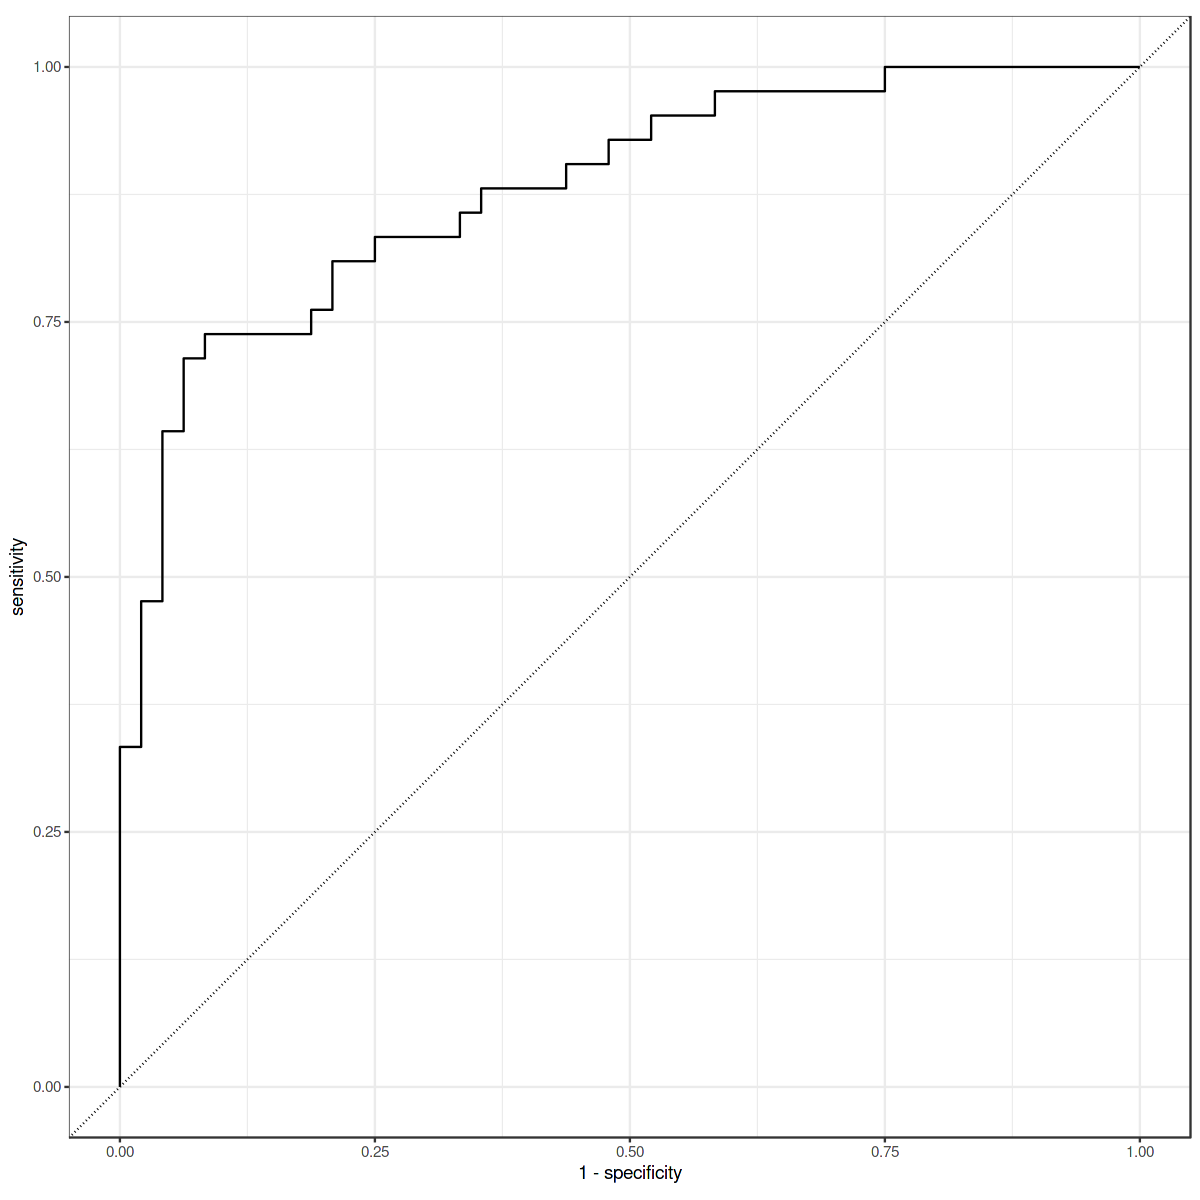

In [28]:
# Set seed for reproducibility
set.seed(12)

# Predicting on test set and add to training set
Predictions_2 <- predict(final_gb_model,
                   new_data = heart_test, 
                   type = "prob") %>% janitor::clean_names() %>%
   mutate(true_class = heart_test$condition)


# Creating and plot the ROC curve
roc_curve(Predictions_2,
          estimate = pred_has_disease,
          truth = true_class) %>% autoplot()


# Calculating the AUC
roc_auc(Predictions_2,
    estimate = pred_has_disease, 
    truth = true_class)

**Confusion matrix**

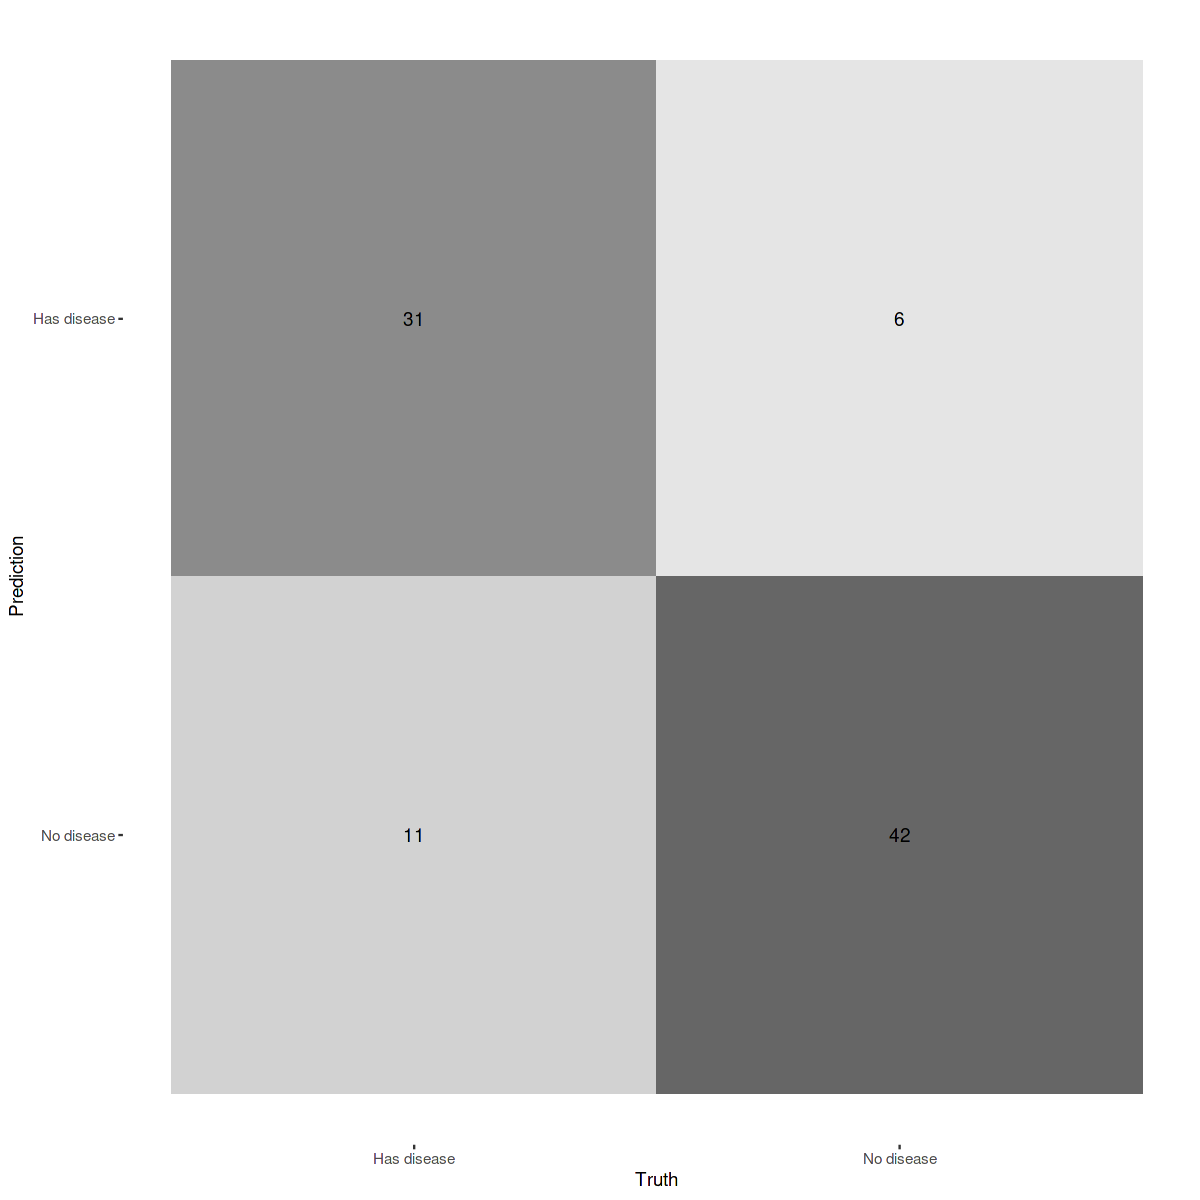

In [29]:
predictions_2 <- predict(final_gb_model,
                   new_data = heart_test, 
                   type = "class") %>% janitor::clean_names() %>%
   mutate(true_class = heart_test$condition)



conf_mat(predictions_2,
         truth = true_class,
         estimate = pred_class) %>% 
  # Create a heat map
  autoplot(type = 'heatmap')

**Checking other metrics**

In [30]:
# Using the  confusion matrix to view other metrics like precision, recall etc by passing the summary() functionconf_mat(predictions_2,
Metrics <- conf_mat(prediction_2,truth = true_class,
         estimate = pred_class) %>% 
  # Passing to the summary() function
  summary()

Metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8222222
kap,binary,0.6385542
sens,binary,0.7142857
spec,binary,0.9166667
ppv,binary,0.8823529
npv,binary,0.7857143
mcc,binary,0.6492446
j_index,binary,0.6309524
bal_accuracy,binary,0.8154762


**Variable Importance**


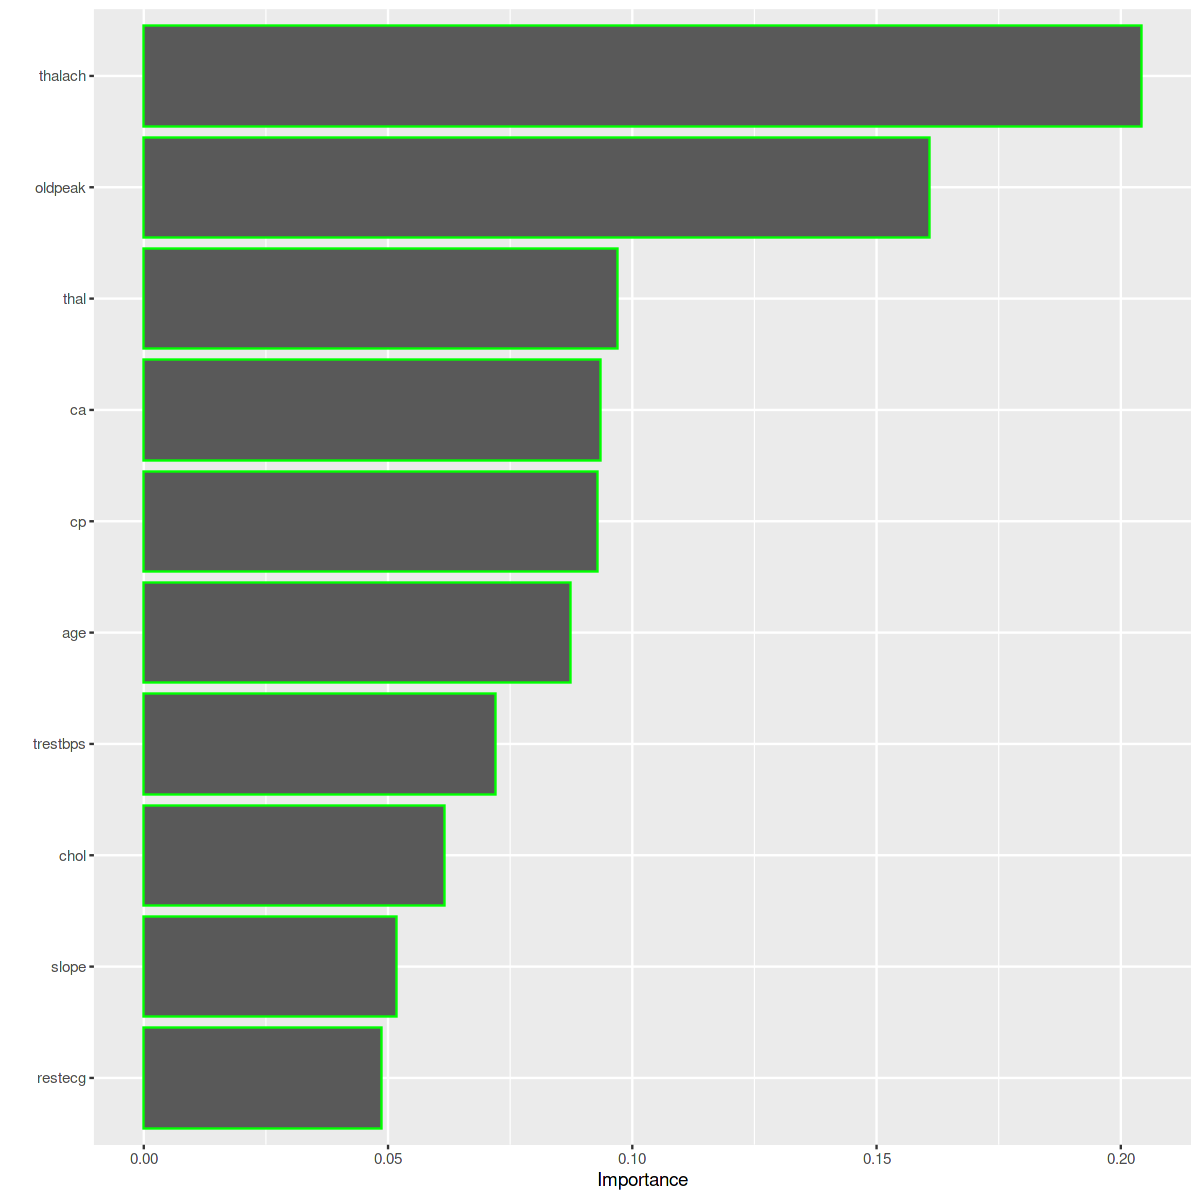

In [31]:
# Plot the variable importance
vip::vip(final_gb_model, aesthetics = list(color = 'green'))


# Model comparison

mean,model
<dbl>,<chr>
0.9007511,Random Forest
0.9285998,Gradient Boosting


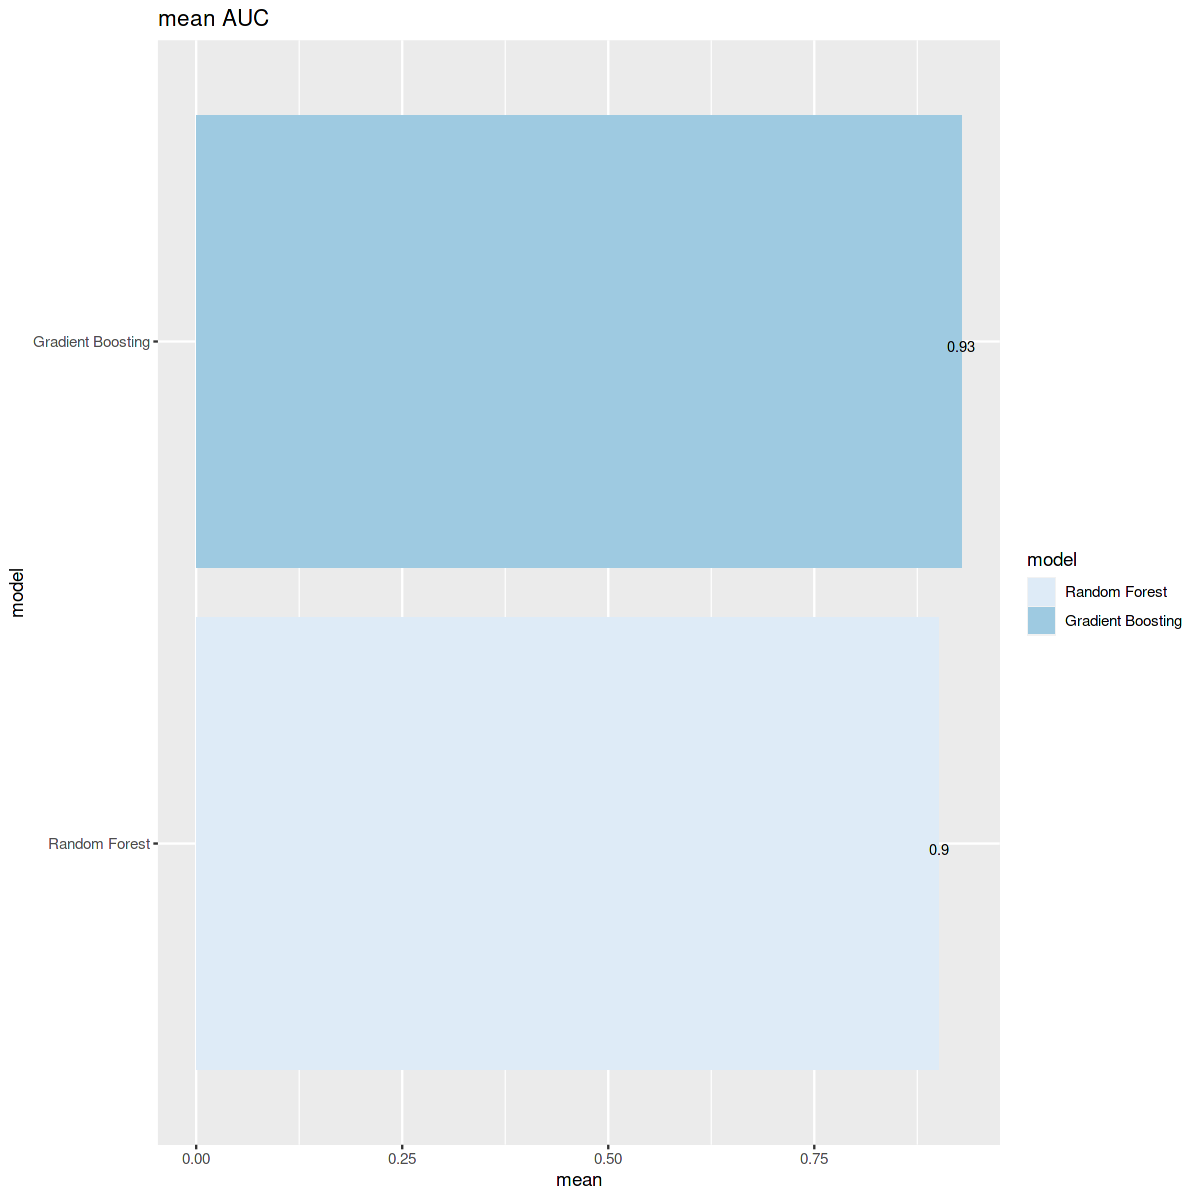

In [32]:
RF <- show_best_params %>% 
  select(mean) %>% 
  mutate(model = "Random Forest")



GB <- Show_best_params %>% 
  select(mean) %>%
  mutate(model = "Gradient Boosting")

#creating dataframe with the 2 variables above
model_compare <- bind_rows(RF, GB)
model_compare



# showing mean area under the curve (auc) per model
model_compare %>% 
  arrange(mean) %>% 
  mutate(model = fct_reorder(model, mean)) %>%
  ggplot(aes(model, mean, fill=model)) +
  geom_col() +
  coord_flip() +
  scale_fill_brewer(palette = "Blues") + 
     geom_text(
         size = 3,
         aes(label = round(mean, 2)),
         vjust = 1
  ) + labs(title = "mean AUC")

**If you enjoyed this kernel, please upvote**

**Also let me know what you think in the comment section**

**THANK YOU**